Импорт библиотек

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

Обработка данных

In [85]:
data=pd.read_csv('k_close_data.csv')
data_drink=data['Кофе или чай?']
data.drop(data.columns[[0,1]],axis=1,inplace=True)
test_data=data.iloc[35:]
data=data.iloc[0:35]
rows,col=data.shape
col_name=data.columns.values.tolist()
dict_list=dict.fromkeys(data.columns.values.tolist())
koefs={}
for i in range(col):
  vars=data.iloc[:,i].values.tolist()
  vars=list(set(vars))
  kor_tea=dict.fromkeys(vars,0)
  kor_coffee=dict.fromkeys(vars,0)
  for j in range(rows):
    cell=data.iloc[j:j+1,i:i+1].values.tolist()
    if (data_drink.iloc[j:j+1]=='Чай').bool():
      kor_tea[cell[0][0]]+=1
    else:
      kor_coffee[cell[0][0]]+=1
  dict_list[col_name[i]]=[kor_tea,kor_coffee]
  for k in vars:
    if type(k)!=str:
      if math.isnan(k):
        continue
    koefs[k]=abs(kor_tea[k]-kor_coffee[k])/(kor_tea[k]+kor_coffee[k])
  print('Чай',kor_tea,"Кофе",kor_coffee)
print(koefs)

Чай {'М': 21, 'Ж': 3} Кофе {'М': 9, 'Ж': 2}
Чай {'Нет': 10, nan: 1, 'Да': 13} Кофе {'Нет': 3, nan: 0, 'Да': 8}
Чай {'Нет': 10, 'Да': 14} Кофе {'Нет': 7, 'Да': 4}
Чай {'Нет': 21, 'Да': 3} Кофе {'Нет': 8, 'Да': 3}
Чай {'Сова': 19, 'Жаворонок': 5} Кофе {'Сова': 9, 'Жаворонок': 2}
Чай {'Нет': 10, 'Да': 14} Кофе {'Нет': 2, 'Да': 9}
Чай {'Позднее 8 утра': 16, '6-7 утра': 2, '5-6 утра': 0, '7-8 утра': 6} Кофе {'Позднее 8 утра': 7, '6-7 утра': 0, '5-6 утра': 2, '7-8 утра': 2}
Чай {'Северо-западный административный округ': 1, 'Южный административный округ': 8, 'Юго-Западный административный округ': 2, 'Центральный административный округ': 0, nan: 1, 'Северный административный округ': 0, 'Восточный административный округ': 5, 'Северо-Восточный административный округ': 2, 'Подмосковье': 2, 'Юго-Восточный административный округ': 3} Кофе {'Северо-западный административный округ': 1, 'Южный административный округ': 2, 'Юго-Западный административный округ': 0, 'Центральный административный округ': 1

Получение координат для начальных данных

In [86]:
coords={}
for i in range(rows):
  x_start=0
  for j in range(col):
    cell=data.iloc[i:i+1,j:j+1].values.tolist()
    cell=cell[0][0]
    if type(cell)!=str:
      if math.isnan(cell):
        continue
    x_start+=koefs[cell]
  tmp=data_drink.iloc[i:i+1].values.tolist()
  coords[x_start]=tmp[0]
print(coords)

{4.474534161490683: 'Чай', 3.6474120082815733: 'Кофе', 4.461076604554865: 'Чай', 4.8436853002070395: 'Чай', 3.6498964803312632: 'Чай', 4.125258799171842: 'Чай', 4.147412008281574: 'Кофе', 4.710351966873706: 'Кофе', 3.9372670807453414: 'Чай', 4.685714285714286: 'Чай', 3.4879917184265006: 'Кофе', 3.8213250517598345: 'Чай', 3.1474120082815733: 'Кофе', 4.763354037267081: 'Чай', 2.7600414078674946: 'Кофе', 3.337888198757764: 'Чай', 4.299171842650104: 'Кофе', 3.8958592132505174: 'Чай', 3.5672877846790887: 'Чай', 3.2672877846790893: 'Чай', 3.559420289855072: 'Кофе', 3.9165631469979294: 'Чай', 3.4006211180124226: 'Чай', 3.1101449275362314: 'Чай', 4.352380952380952: 'Чай', 4.0045548654244305: 'Чай', 4.053830227743271: 'Чай', 3.8006211180124225: 'Чай', 4.249896480331262: 'Кофе'}


Вывод начальных данных на график

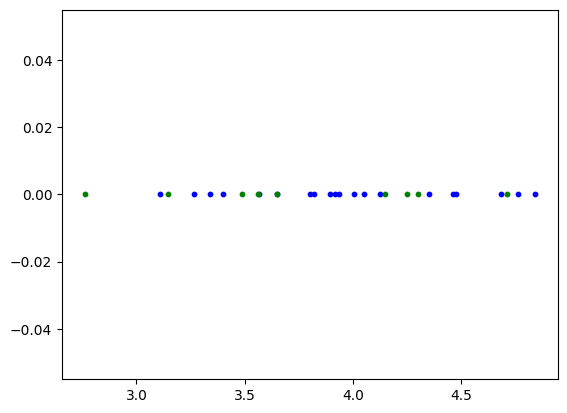

In [87]:
fig, ax = plt.subplots()
tea_x=[]
cof_x=[]
tea_y=[]
cof_y=[]
for i in coords:
  if coords[i]=="Чай":
    tea_x.append(i)
    tea_y.append(0)
  else:
    cof_x.append(i)
    cof_y.append(0)

ax.scatter(tea_x,tea_y, s=10, c="blue")
ax.scatter(cof_x,cof_y, s=10, c="green")
plt.show()

Подготовка тестовых данных

In [88]:
coords_test={}
t_rows,t_col=test_data.shape
for i in range(t_rows):
  x_start=0
  for j in range(t_col):
    cell=test_data.iloc[i:i+1,j:j+1].values.tolist()
    cell=cell[0][0]
    if type(cell)!=str:
      if math.isnan(cell):
        continue
    if cell not in koefs:
      continue
    x_start+=koefs[cell]
  tmp=data_drink.iloc[i:i+1].values.tolist()
  coords_test[x_start]=tmp[0]
print(coords_test)

{3.600621118012423: 'Чай', 3.6784679089026917: 'Кофе', 4.46583850931677: 'Чай', 4.453830227743271: 'Чай', 2.698136645962733: 'Чай', 4.0045548654244305: 'Чай'}


Проверка на тестовых данных

Думаю, что ты пьешь Чай
На самом деле я пью  Чай


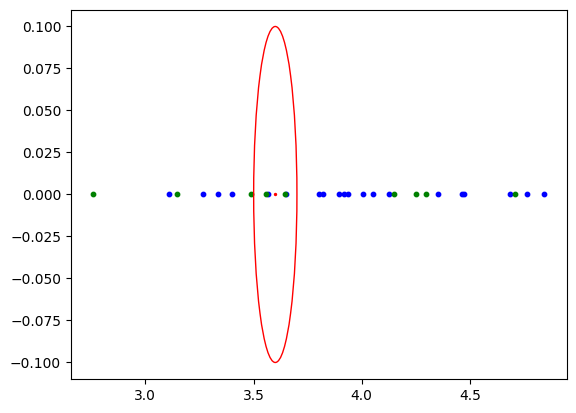

Думаю, что ты пьешь Чай
На самом деле я пью  Кофе


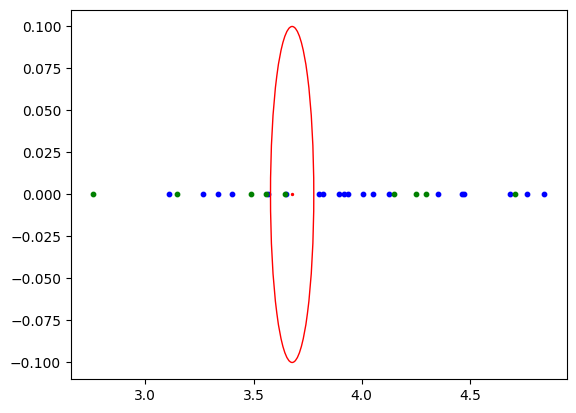

Думаю, что ты пьешь Чай
На самом деле я пью  Чай


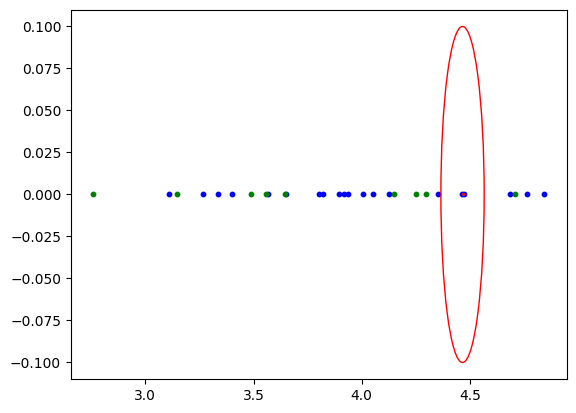

Думаю, что ты пьешь Чай
На самом деле я пью  Чай


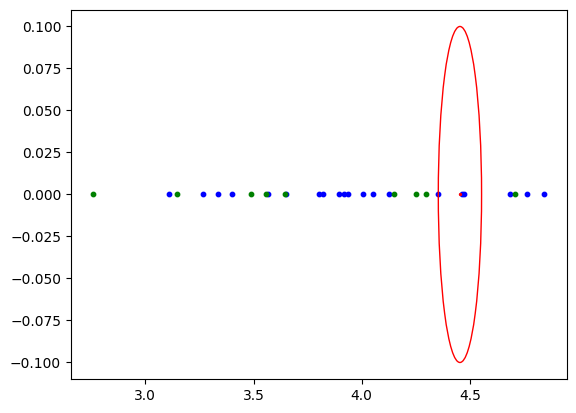

Думаю, что ты пьешь Кофе
На самом деле я пью  Чай


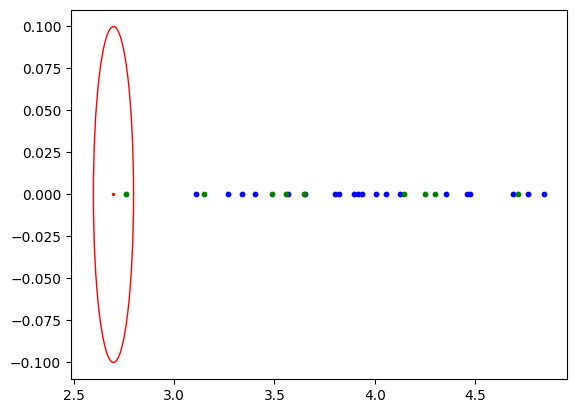

Думаю, что ты пьешь Чай
На самом деле я пью  Чай


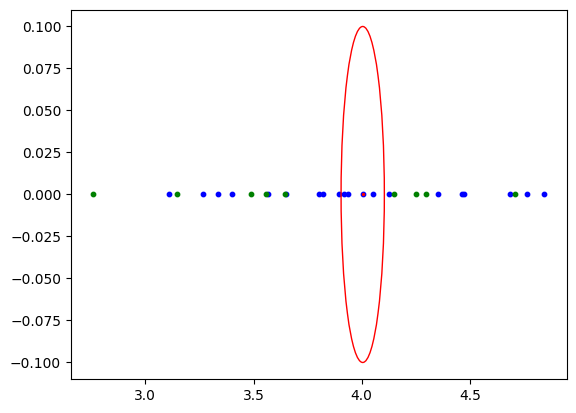

Точность на тестовых данных: 0.6666666666666666


In [96]:
count=0
for new_coord in coords_test:
  new_ans=0
  k=0.1
  flag=True
  while flag==True:
    for i in tea_x:
      if abs(new_coord-i)<=k:
        if flag==True:
          flag=!flag
        new_ans+=1/np.exp(abs(new_coord-i))
    for i in cof_x:
      if abs(new_coord-i)<=k:
        if flag==True:
          flag=!flag
        new_ans-=1/np.exp(abs(new_coord-i))
    if flag==True:
      k+=0.05
      continue
    if new_ans<0:
      print("Думаю, что ты пьешь Кофе")
      if coords_test[new_coord]=="Кофе":
        count+=1
    elif new_ans>0:
      print('Думаю, что ты пьешь Чай')
      if coords_test[new_coord]=="Чай":
        count+=1
    else:
      print("Думаю, что ты засохнешь")
    print("На самом деле я пью ",coords_test[new_coord])
  circle1 = plt.Circle((new_coord, 0), k, color='r', fill=False)
  fig, ax = plt.subplots()
  ax.scatter(tea_x,tea_y, s=10, c="blue")
  ax.scatter(cof_x,cof_y, s=10, c="green")
  ax.scatter(new_coord,0, s=2, c="red")
  ax=plt.gca()
  ax.add_patch(circle1)
  plt.show()
print("Точность на тестовых данных:",count/len(coords_test))

Ввод и тест новых данных

Думаю, что ты пьешь Чай


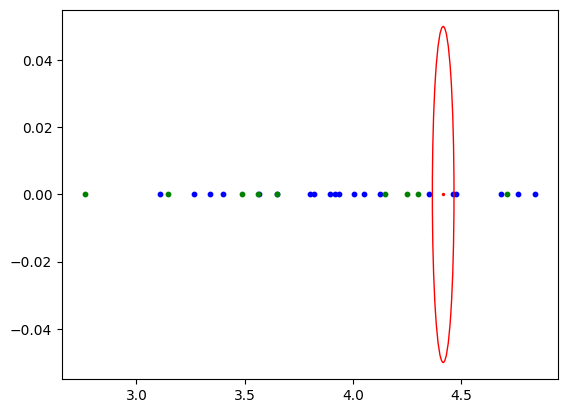

In [95]:
vvod=[]
inp=int(input('Ваш пол: \nМужской - 1 \nЖенский - 2\n'))
if inp==1:
  vvod.append("М")
else:
  vvod.append("Ж")
clear_output()
inp=int(input('Занимаетесь спортом?: \nДа - 1 \nНет - 2\n'))
if inp==1:
  vvod.append("Да")
else:
  vvod.append("Нет")
clear_output()
inp=int(input('Есть ли работа?: \nДа - 1 \nНет - 2\n'))
if inp==1:
  vvod.append("Да")
else:
  vvod.append("Нет")
clear_output()
inp=int(input('Есть ли сердечные заболевания?: \nДа - 1 \nНет - 2\n'))
if inp==1:
  vvod.append("Да")
else:
  vvod.append("Нет")
clear_output()
inp=int(input('Вы Сова или Жаворонок: \nСова - 1 \nЖаворонок - 2\n'))
if inp==1:
  vvod.append("Сова")
else:
  vvod.append("Жаворонок")
clear_output()
inp=int(input('Есть ли молоко в холодильнике?: \nДа - 1 \nНет - 2\n'))
if inp==1:
  vvod.append("Да")
else:
  vvod.append("Нет")
clear_output()
inp=int(input('Ваше время подъема: \n5-6 утра - 1 \n6-7 утра - 2\n7-8 утра - 3\nПозднее 8 утра - 4\n'))
if inp==1:
  vvod.append("5-6 утра")
elif inp==2:
  vvod.append("6-7 утра")
elif inp==3:
  vvod.append("7-8 утра")
else:
  vvod.append("Позднее 8 утра")
clear_output()
inp=int(input('Ваш Административный округ:'
'\nСеверный административный округ - 1'
'\nСеверо-Восточный административный округ - 2'
'\nВосточный административный округ- 3'
'\nЮго-Восточный административный округ - 4'
'\nЮжный административный округ - 5'
'\nЮго-Западный административный округ - 6'
'\nЗападный административный округ - 7'
'\nСеверо-западный административный округ - 8'
'\nЗеленоградский - 9'
'\nТроицкий - 10'
'\nНовомосковский - 11'
'\nЦентральный административный округ - 12'
'\nПодмосковье - 13\n'))
if inp==1:
  vvod.append("Северный административный округ")
elif inp==2:
  vvod.append("Северо-Восточный административный округ")
elif inp==3:
  vvod.append("Восточный административный округ")
elif inp==4:
  vvod.append("Юго-Восточный административный округ")
elif inp==5:
  vvod.append("Южный административный округ")
elif inp==6:
  vvod.append("Юго-Западный административный округ")
elif inp==7:
  vvod.append("Западный административный округ")
elif inp==8:
  vvod.append("Северо-западный административный округ")
elif inp==9:
  vvod.append("Зеленоградский")
elif inp==10:
  vvod.append("Троицкий")
elif inp==11:
  vvod.append("Новомосковский")
elif inp==12:
  vvod.append("Центральный административный округ")
else:
  vvod.append("Подмосковье")
clear_output()
inp=int(input('Ваше время сна: \nМенее 3 часов - 1 \nОт 3 до 6 часов - 2\n7-8 часов - 3\nБолее 8 часов - 4\n'))
if inp==1:
  vvod.append("Менее 3 часов")
elif inp==2:
  vvod.append("От 3 до 6 часов")
elif inp==3:
  vvod.append("7-8 часов")
else:
  vvod.append("Более 8 часов")
clear_output()
new_coord=0
new_ans=0
k=0.1
for i in vvod:
  if i not in koefs:
    continue
  new_coord+=koefs[i]
flag=True
while flag==True:
  for i in tea_x:
    if abs(new_coord-i)<=k:
      if flag==True:
        flag=!flag
      new_ans+=1/np.exp(abs(new_coord-i))
  for i in cof_x:
    if abs(new_coord-i)<=k:
      if flag==True:
        flag=!flag
      new_ans-=1/np.exp(abs(new_coord-i))
  if flag==True:
    k+=0.05
    continue
  if new_ans<0:
    print("Думаю, что ты пьешь Кофе")
  elif new_ans>0:
    print('Думаю, что ты пьешь Чай')
  else:
    print("Думаю, что ты засохнешь")
circle1 = plt.Circle((new_coord, 0), k, color='r', fill=False)
fig, ax = plt.subplots()
ax.scatter(tea_x,tea_y, s=10, c="blue")
ax.scatter(cof_x,cof_y, s=10, c="green")
ax.scatter(new_coord,0, s=2, c="red")
ax=plt.gca()
ax.add_patch(circle1)
plt.show()